In [1]:
import pydicom as dicom
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
import scipy.io
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import patches
from scipy.stats import iqr
import nibabel as nb
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
#import seaborn as sns

In [2]:
data_folder = '/mnt/LiDXXLab_Files/Haoran/prostate_QM/training_dataset_3/'

orignal_image_path = data_folder + 'elastic_resized/'
seg_path = data_folder + 'ROI_LABEL/'


#prediction_path_t2map = '/mnt/LiDXXLab_Files/Haoran/prostate_QM/trianing_model/sub_21_cv/t2m/Best_model/Unet_mean3stdnorm_exblader_20220926/sub_23__Unet_CVsplit1_epoch50_20220926/'
#prediction_path_t2map = '/mnt/LiDXXLab_Files/Haoran/prostate_QM/trianing_model/sub_21_cv/t2m/Inter_model/Unet_mean3stdnorm_exblader_20220921/sub_21__Unet_CVsplit1_epoch50_20220921/'



In [3]:
subject_list1 = ['sub1117','sub1216', 'sub0413','sub0106']#

subject_list2 =  ['sub0427','sub0211']#

subject_list3 = ['sub0419','sub1006','sub0624','sub0415']#,

subject_list4 =  ['sub0930','sub0608','sub1201','sub0125']#

subject_list2 =  []#

subject_list3 = []#,

subject_list4 =  []#

prediction_path1 = '/mnt/LiDXXLab_Files/Haoran/prostate_QM/trianing_model/sub_21_cv/t2m/Inter_model/Unet_mean3stdnorm_exblader_20220921/sub_21__Unet_CVsplit1_epoch50_20220921/'
prediction_path2 = '/mnt/LiDXXLab_Files/Haoran/prostate_QM/trianing_model/sub_21_cv2/t2m/Inter_model/Unet_mean3stdnorm_exblader_20220921/sub_21__Unet_CVsplit2_epoch40_20220921/'
prediction_path3 = '/mnt/LiDXXLab_Files/Haoran/prostate_QM/trianing_model/sub_21_cv3/t2m/Inter_model/Unet_mean3stdnorm_exblader_20220921/sub_21__Unet_CVsplit3_epoch40_20220921/'
prediction_path4 = '/mnt/LiDXXLab_Files/Haoran/prostate_QM/trianing_model/sub_21_cv4/t2m/Inter_model/Unet_mean3stdnorm_exblader_20220921/sub_21__Unet_CVsplit4_epoch30_20220921/'


prediction_path1 = '/mnt/LiDXXLab_Files/Haoran/prostate_QM/trianing_model/sub_21_cv/t2m/Inter_model/Unet_mean3stdnorm_exblader_20220928/sub_23__Unet_CVsplit1_epoch50_20220928/'
prediction_path2 = '/mnt/LiDXXLab_Files/Haoran/prostate_QM/trianing_model/sub_21_cv2/t2m/Inter_model/Unet_mean3stdnorm_exblader_20220928/sub_23__Unet_CVsplit2_epoch40_20220928/'
#prediction_path3 = '/mnt/LiDXXLab_Files/Haoran/prostate_QM/trianing_model/sub_21_cv3/t2m/Inter_model/Unet_mean3stdnorm_exblader_20220928/sub_23__Unet_CVsplit3_epoch50_20220928/'
prediction_path3 = '/mnt/LiDXXLab_Files/Haoran/prostate_QM/trianing_model/sub_23__Unet_CVsplit3_epoch50_20220928/'
prediction_path4 = '/mnt/LiDXXLab_Files/Haoran/prostate_QM/trianing_model/sub_21_cv4/t2m/Inter_model/Unet_mean3stdnorm_exblader_20220928/sub_23__Unet_CVsplit4_epoch50_20220928/'


In [4]:
prediction_path1 = '/mnt/LiDXXLab_Files/Haoran/prostate_QM/trianing_model/sub_25_cv/t2m_fitted/Inter_model/Unet_mean3stdnorm_exblader_20221212/sub_25_Unet_CVsplit1_epoch50_20221212/'

prediction_path2 = '/mnt/LiDXXLab_Files/Haoran/prostate_QM/trianing_model/sub_25_cv/t2m_fitted/Inter_model/Unet_mean3stdnorm_exblader_20221212/sub_25_Unet_CVsplit2_epoch50_20221212/'

prediction_path3 = '/mnt/LiDXXLab_Files/Haoran/prostate_QM/trianing_model/sub_25_cv/t2m_fitted/Inter_model/Unet_mean3stdnorm_exblader_20221212/sub_25_Unet_CVsplit3_epoch40_20221212/'

prediction_path4 = '/mnt/LiDXXLab_Files/Haoran/prostate_QM/trianing_model/sub_25_cv/t2m_fitted/Inter_model/Unet_mean3stdnorm_exblader_20221212/sub_25_Unet_CVsplit4_epoch50_20221212/'



In [5]:

t2w_tumor = []
t2w_non_tumor = []


t2m_tumor = []
t2m_non_tumor = []

t2m_prediction_tumor = []
t2m_prediction_non_tumor = []



In [6]:
for subject_id in subject_list1:
    
    
    t2w_temp = nb.load(orignal_image_path+subject_id+'/t2_elastic_resized.nii').get_fdata().astype(np.float32)
    
    t2m_temp = nb.load(orignal_image_path+subject_id+'/t2m_fitted_elastic_resized.nii').get_fdata().astype(np.float32)
    
    t2m_predcition_temp = nb.load(prediction_path1+subject_id+'.nii').get_fdata().astype(np.float32)
    
    value_mask  = np.ones(np.shape(t2m_temp))
    value_mask[t2m_temp > 400] = 0
    
    seg_t2weighted_temp = nb.load(seg_path+'t2weighted_as_main/'+subject_id+'_t2w_segmentation.nii').get_fdata().astype(np.float32)
    seg_t2map_temp = nb.load(seg_path+'t2map_as_main/'+subject_id+'_t2m_segmentation.nii').get_fdata().astype(np.float32)
   
    seg_t2weighted_temp = seg_t2weighted_temp*value_mask
    seg_t2map_temp = seg_t2map_temp*value_mask

    
    t2w_tumor.append(np.mean(t2w_temp[seg_t2weighted_temp==1]))
    t2w_non_tumor.append(np.mean(t2w_temp[seg_t2weighted_temp==2]))

    t2m_tumor.append(np.mean(t2m_temp[seg_t2map_temp==1]))
    t2m_non_tumor.append(np.mean(t2m_temp[seg_t2map_temp==2]))
    
    t2m_prediction_tumor.append(np.mean(t2m_predcition_temp[seg_t2weighted_temp==1 ])*400)
    t2m_prediction_non_tumor.append(np.mean(t2m_predcition_temp[seg_t2weighted_temp==2 ])*400)
    
    

In [7]:
for subject_id in subject_list2:
    
    
    t2w_temp = nb.load(orignal_image_path+subject_id+'/t2_elastic_resized.nii').get_fdata().astype(np.float32)
    
    t2m_temp = nb.load(orignal_image_path+subject_id+'/t2m_fitted_elastic_resized.nii').get_fdata().astype(np.float32)
    
    t2m_predcition_temp = nb.load(prediction_path2+subject_id+'.nii').get_fdata().astype(np.float32)
    
    
    value_mask  = np.ones(np.shape(t2m_temp))
    value_mask[t2m_temp > 400] = 0
    
    seg_t2weighted_temp = nb.load(seg_path+'t2weighted_as_main/'+subject_id+'_t2w_segmentation.nii').get_fdata().astype(np.float32)
    seg_t2map_temp = nb.load(seg_path+'t2map_as_main/'+subject_id+'_t2m_segmentation.nii').get_fdata().astype(np.float32)
   
    seg_t2weighted_temp = seg_t2weighted_temp*value_mask
    seg_t2map_temp = seg_t2map_temp*value_mask
   
    t2w_tumor.append(np.mean(t2w_temp[seg_t2weighted_temp==1]))
    t2w_non_tumor.append(np.mean(t2w_temp[seg_t2weighted_temp==2]))

    t2m_tumor.append(np.mean(t2m_temp[seg_t2map_temp==1]))
    t2m_non_tumor.append(np.mean(t2m_temp[seg_t2map_temp==2]))
    
    t2m_prediction_tumor.append(np.mean(t2m_predcition_temp[seg_t2weighted_temp==1])*400)
    t2m_prediction_non_tumor.append(np.mean(t2m_predcition_temp[seg_t2weighted_temp==2])*400)

In [8]:
for subject_id in subject_list3:
    
    
    t2w_temp = nb.load(orignal_image_path+subject_id+'/t2_elastic_resized.nii').get_fdata().astype(np.float32)
    
    t2m_temp = nb.load(orignal_image_path+subject_id+'/t2m_fitted_elastic_resized.nii').get_fdata().astype(np.float32)
    
    t2m_predcition_temp = nb.load(prediction_path3+subject_id+'.nii').get_fdata().astype(np.float32)
    
    
    value_mask  = np.ones(np.shape(t2m_temp))
    value_mask[t2m_temp > 400] = 0
    
    seg_t2weighted_temp = nb.load(seg_path+'t2weighted_as_main/'+subject_id+'_t2w_segmentation.nii').get_fdata().astype(np.float32)
    seg_t2map_temp = nb.load(seg_path+'t2map_as_main/'+subject_id+'_t2m_segmentation.nii').get_fdata().astype(np.float32)
   
    seg_t2weighted_temp = seg_t2weighted_temp*value_mask
    seg_t2map_temp = seg_t2map_temp*value_mask
   
    t2w_tumor.append(np.mean(t2w_temp[seg_t2weighted_temp==1]))
    t2w_non_tumor.append(np.mean(t2w_temp[seg_t2weighted_temp==2]))

    t2m_tumor.append(np.mean(t2m_temp[seg_t2map_temp==1]))
    t2m_non_tumor.append(np.mean(t2m_temp[seg_t2map_temp==2]))
    
    t2m_prediction_tumor.append(np.mean(t2m_predcition_temp[seg_t2weighted_temp==1])*400)
    t2m_prediction_non_tumor.append(np.mean(t2m_predcition_temp[seg_t2weighted_temp==2])*400)

In [9]:
for subject_id in subject_list4:
    
    
    t2w_temp = nb.load(orignal_image_path+subject_id+'/t2_elastic_resized.nii').get_fdata().astype(np.float32)
    
    t2m_temp = nb.load(orignal_image_path+subject_id+'/t2m_fitted_elastic_resized.nii').get_fdata().astype(np.float32)
    
    t2m_predcition_temp = nb.load(prediction_path4+subject_id+'.nii').get_fdata().astype(np.float32)
    
    
    value_mask  = np.ones(np.shape(t2m_temp))
    value_mask[t2m_temp > 400] = 0
    
    seg_t2weighted_temp = nb.load(seg_path+'t2weighted_as_main/'+subject_id+'_t2w_segmentation.nii').get_fdata().astype(np.float32)
    seg_t2map_temp = nb.load(seg_path+'t2map_as_main/'+subject_id+'_t2m_segmentation.nii').get_fdata().astype(np.float32)
   
    seg_t2weighted_temp = seg_t2weighted_temp*value_mask
    seg_t2map_temp = seg_t2map_temp*value_mask
   
    t2w_tumor.append(np.mean(t2w_temp[seg_t2weighted_temp==1]))
    t2w_non_tumor.append(np.mean(t2w_temp[seg_t2weighted_temp==2]))

    t2m_tumor.append(np.mean(t2m_temp[seg_t2map_temp==1]))
    t2m_non_tumor.append(np.mean(t2m_temp[seg_t2map_temp==2]))
    
    t2m_prediction_tumor.append(np.mean(t2m_predcition_temp[seg_t2weighted_temp==1])*400)
    t2m_prediction_non_tumor.append(np.mean(t2m_predcition_temp[seg_t2weighted_temp==2])*400)

In [10]:
print(np.shape(t2m_tumor))

(14,)


In [11]:
print(t2m_prediction_tumor)
print(t2m_prediction_non_tumor)

[94.82329487800598, 77.76461839675903, 80.72350025177002, 96.13723158836365, 70.28641104698181, 64.44594860076904, 82.79342651367188, 49.558570981025696, 87.18246221542358, 71.91961407661438, 104.18397188186646, 85.37830114364624, 117.71997213363647, 89.12399411201477]
[118.46678256988525, 106.54609203338623, 98.07115197181702, 120.51777839660645, 113.52211236953735, 110.34364700317383, 106.88368082046509, 69.48363184928894, 111.98357343673706, 131.52060508728027, 118.111252784729, 116.84110164642334, 121.92622423171997, 122.16269969940186]


In [12]:
print(t2m_tumor)
print(t2m_non_tumor)

[86.12304, 64.79368, 65.91553, 87.42013, 110.276436, 68.701904, 84.63941, 65.15992, 84.502975, 79.50725, 77.474525, 82.703125, 107.053604, 85.316055]
[115.34251, 112.891106, 104.86006, 137.72404, 159.38026, 118.57281, 113.45898, 103.436775, 137.88339, 184.63959, 98.90937, 124.66081, 158.03464, 123.739075]


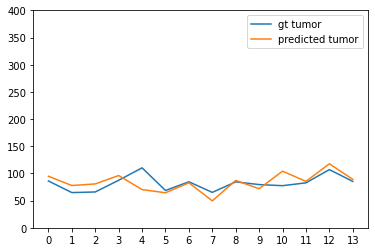

In [13]:
x = [0,1,2,3,4,5,6,7,8,9,10,11,12,13]
plt.plot(t2m_tumor,label = 'gt tumor')
plt.plot(t2m_prediction_tumor,label = 'predicted tumor')

plt.ylim([0,400])
plt.xticks(x)
plt.legend()
#plt.plot(t2m_tumor)
#plt.plot(t2m_non_tumor)

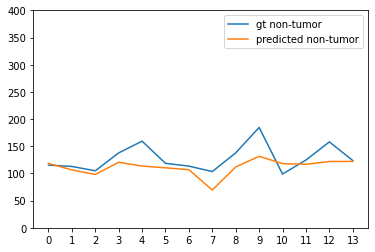

In [14]:
plt.plot(t2m_non_tumor,label = 'gt non-tumor')
plt.plot(t2m_prediction_non_tumor,label = 'predicted non-tumor')
plt.ylim([0,400])
plt.xticks(x)
plt.legend()

([<matplotlib.axis.XTick at 0x7f1fd60eed90>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

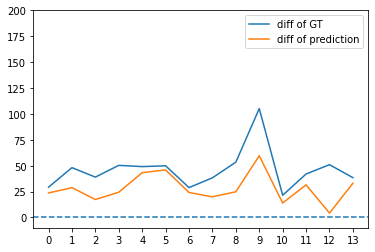

In [15]:
delta_orignal = np.array(t2m_non_tumor)-np.array(t2m_tumor)
delta_pre = np.array(t2m_prediction_non_tumor)-np.array(t2m_prediction_tumor)
plt.plot(delta_orignal,label= 'diff of GT')
plt.plot(delta_pre,label= 'diff of prediction')
plt.axhline(0,linestyle = '--')
plt.ylim([-10,200])
plt.legend(loc = 'upper right')
plt.xticks(x)

In [16]:
sum_nontumor = 0.5*(np.array(t2m_non_tumor)+np.array(t2m_prediction_non_tumor))
sum_tumor = 0.5*(np.array(t2m_tumor)+np.array(t2m_prediction_tumor))

diff_nontumor = (np.array(t2m_non_tumor)-np.array(t2m_prediction_non_tumor))
diff_tumor = (np.array(t2m_tumor)-np.array(t2m_prediction_tumor))

md_tumor = np.mean(diff_tumor)
md_nontumor = np.mean(diff_nontumor)


sd_tumor = np.std(diff_tumor)
sd_nontumor = np.std(diff_nontumor)

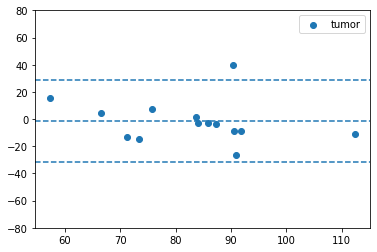

In [17]:
plt.scatter(sum_tumor,diff_tumor,label = 'tumor')
plt.axhline(md_tumor,linestyle = '--')
plt.axhline(md_tumor+1.96*sd_tumor,linestyle = '--')
plt.axhline(md_tumor-1.96*sd_tumor,linestyle = '--')
plt.ylim([-80,80])
plt.legend(loc = 'upper right')
plt.show()

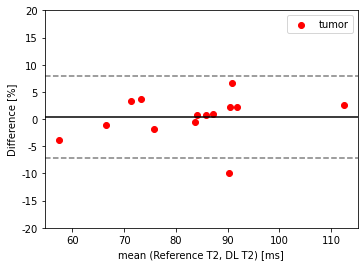

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pdb
from numpy.random import random

def bland_altman_plot(data1, data2, *args, **kwargs):
    data1     = np.asarray(data1)
    data2     = np.asarray(data2)
    mean      = np.mean([data1, data2], axis=0)
    diff      = (data2 - data1)                  # Difference between data1 and data2
    md        = np.mean(diff)                   # Mean of the difference
    sd        = np.std(diff, axis=0)            # Standard deviation of the difference
    CI_low    = md - 1.96*sd
    CI_high   = md + 1.96*sd

    plt.scatter(mean, diff, *args, **kwargs,color = 'red',label = 'tumor')
    plt.axhline(md,           color='black', linestyle='-')
    plt.axhline(md + 1.96*sd, color='gray', linestyle='--')
    plt.axhline(md - 1.96*sd, color='gray', linestyle='--')
    return md, sd, mean, CI_low, CI_high


md, sd, mean, CI_low, CI_high = bland_altman_plot(t2m_tumor,t2m_prediction_tumor)
#plt.title(r"$\mathbf{Bland-Altman}$" + " " + r"$\mathbf{Plot}$")
plt.xlabel("mean (Reference T2, DL T2) [ms]")
plt.legend()
plt.ylabel("Difference [%]")
plt.ylim([-80,80])
plt.yticks([-80,-60,-40,-20,0,20,40,60,80],[-20,-15,-10,-5,0,5,10,15,20])
#plt.yticks([])
xOutPlot = np.min(mean) + (np.max(mean)-np.min(mean))*1.14


plt.subplots_adjust(right=0.85)

plt.savefig('tumorBP.png')
plt.show()

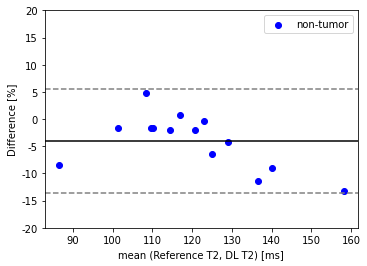

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pdb
from numpy.random import random

def bland_altman_plot(data1, data2, *args, **kwargs):
    data1     = np.asarray(data1)
    data2     = np.asarray(data2)
    mean      = np.mean([data1, data2], axis=0)
    diff      = data2 - data1                   # Difference between data1 and data2
    md        = np.mean(diff)                   # Mean of the difference
    sd        = np.std(diff, axis=0)            # Standard deviation of the difference
    CI_low    = md - 1.96*sd
    CI_high   = md + 1.96*sd

    plt.scatter(mean, diff, *args, **kwargs,color = 'blue',label = 'non-tumor')
    plt.axhline(md,           color='black', linestyle='-')
    plt.axhline(md + 1.96*sd, color='gray', linestyle='--')
    plt.axhline(md - 1.96*sd, color='gray', linestyle='--')
    return md, sd, mean, CI_low, CI_high


md, sd, mean, CI_low, CI_high = bland_altman_plot(t2m_non_tumor,t2m_prediction_non_tumor)
#plt.title(r"$\mathbf{Bland-Altman}$" + " " + r"$\mathbf{Plot}$")
plt.xlabel("mean (Reference T2, DL T2) [ms]")
plt.legend()
plt.ylabel("Difference [%]")
plt.ylim([-80,80])
plt.yticks([-80,-60,-40,-20,0,20,40,60,80],[-20,-15,-10,-5,0,5,10,15,20])

xOutPlot = np.min(mean) + (np.max(mean)-np.min(mean))*1.14


plt.subplots_adjust(right=0.85)

plt.savefig('NONtumorBP.png')
plt.show()

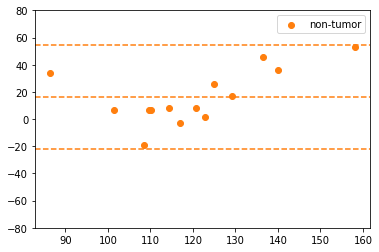

In [20]:
plt.scatter(sum_nontumor,diff_nontumor,color = 'tab:orange',label = 'non-tumor')
plt.axhline(md_nontumor,color = 'tab:orange',linestyle = '--')
plt.axhline(md_nontumor+1.96*sd_nontumor,color = 'tab:orange',linestyle = '--')
plt.axhline(md_nontumor-1.96*sd_nontumor,color = 'tab:orange',linestyle = '--')
plt.legend(loc = 'upper right')
plt.ylim([-80,80])
plt.show()

In [21]:
print(np.mean(diff_tumor))

-1.6038385714803423


In [22]:

print('-------T2 weighted--------/n')
print("non tumor region gt:", np.mean(t2w_non_tumor),"std:",np.std(t2w_non_tumor) ,"; tumor region gt:",np.mean(t2w_tumor) ,"std:",np.std(t2w_tumor) )


-------T2 weighted--------/n
non tumor region gt: 266.99814 std: 52.41953 ; tumor region gt: 151.87773 std: 45.434113


In [23]:

print('-------T2 maps--------/n')
print("non tumor region gt:", np.mean(t2m_non_tumor),"std:",np.std(t2m_non_tumor) ,"; tumor region gt:",np.mean(t2m_tumor) ,"std:",np.std(t2m_tumor) )


-------T2 maps--------/n
non tumor region gt: 128.10953 std: 23.889772 ; tumor region gt: 82.1134 std: 13.46967


In [24]:


print('-------T2 map prediction--------/n')
print("non tumor region prediction:", np.mean(t2m_prediction_non_tumor),"std:",np.std(t2m_prediction_non_tumor) ,"; tumor region prediction:",np.mean(t2m_prediction_tumor) ,"std:",np.std(t2m_prediction_tumor) )


-------T2 map prediction--------/n
non tumor region prediction: 111.88430956431797 std: 14.193734383439685 ; tumor region prediction: 83.71723698718208 std: 16.47442071333945


## T-test

In [25]:
from scipy import stats



In [26]:
stats.ttest_ind(t2m_non_tumor,t2m_prediction_non_tumor)

Ttest_indResult(statistic=2.1052418347764474, pvalue=0.04508409771704747)

In [27]:
stats.ttest_ind(t2m_tumor,t2m_prediction_tumor)

Ttest_indResult(statistic=-0.2717435885652643, pvalue=0.7879653580892516)

## tumor and non-tumor

In [28]:
stats.ttest_ind(t2m_tumor,t2m_non_tumor)

Ttest_indResult(statistic=-6.046996709291015, pvalue=2.1812349900403963e-06)

In [29]:
stats.ttest_ind(t2m_prediction_tumor,t2m_prediction_non_tumor)

Ttest_indResult(statistic=-4.670282327938976, pvalue=8.025766347107672e-05)